# Caderno de Tópicos de Física III

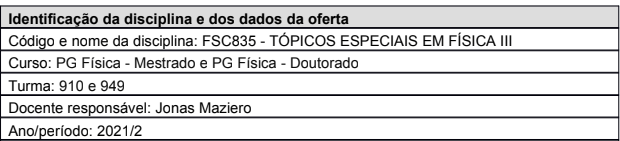

A dinâmica é escolher algum assunto para liderar o seu entendimento e implementação.

#### Os que me interessaram, em ordem

* __Swap de emaranhamento__

* __Swap de estados__

* __Emaranhamento__

* __Discórdia quântica__



# ................................................................................

# Swap de Emaranhamento

O algorítmo cria dois estados de bell emaranhados realizando um teleporte de emaranhamento. São realizadas duas medidas projetivas e aplicando duas portas que dependem do resultados das medidas.
 * Introdução
 * Circuito
 * Matemática
 * Conclusão

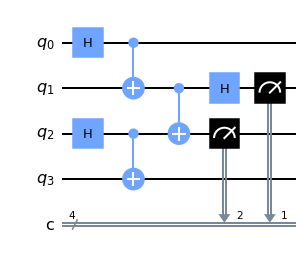

In [2]:
from qiskit import  QuantumCircuit

qc = QuantumCircuit(4,4)

qc.h(0)
qc.h(2)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(1,2)
qc.h(1)
qc.measure(1,1)
qc.measure(2,2)

qc.draw('mpl')

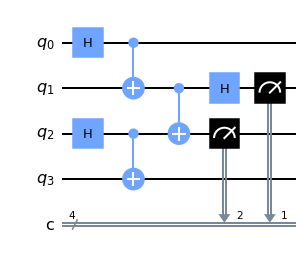

In [2]:
from qiskit import  QuantumCircuit

qc = QuantumCircuit(4,4)

qc.h(0)
qc.h(2)
qc.cx(0,1)
qc.cx(2,3)
qc.cx(1,2)
qc.h(1)
qc.measure(1,1)
qc.measure(2,2)

qc.draw('mpl')

#### Swap de Emaranhamento

O algorítmo cria dois estados de bell emaranhados realizando um teleporte de emaranhamento. São realizadas duas medidas projetivas e aplicando duas portas que dependem do resultados das medidas.

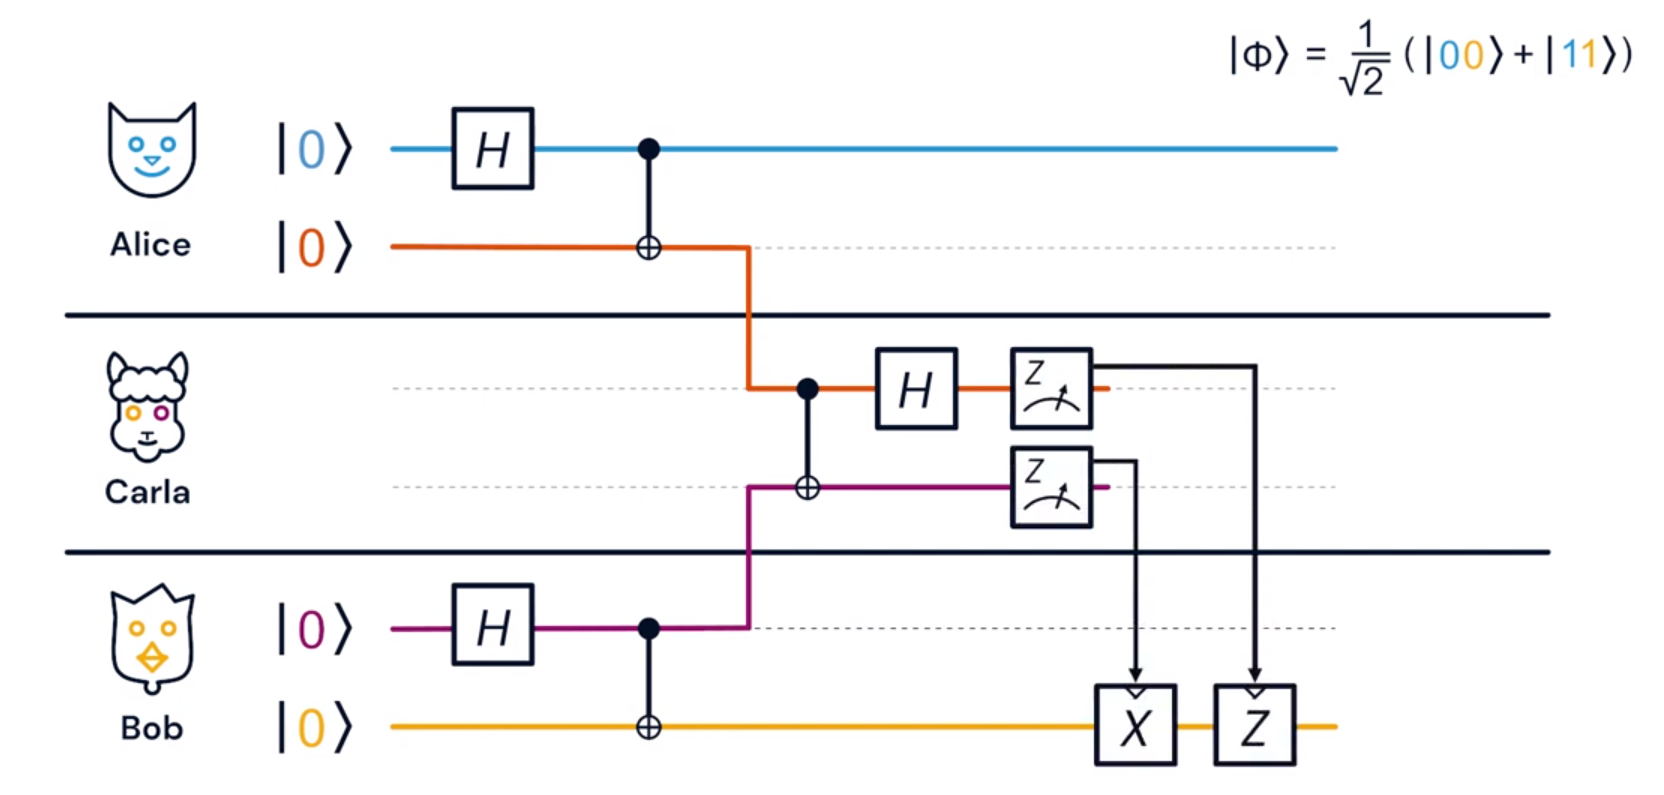

Esse algorítmo nos dá a possibilidade de criar um par emaranhado $q_0$ e $q_3$.

* __O que tem de interessante__
Com esse algorítmo a Alice e o Bob podem estar distantes e criar um par de estados emaranhados.
Em uma fila de átomos podemos emaranhar o primeiro e o 85º átomo fazendo isso..

* __Dúvidas__
 * Então a Carla deve receber 1 qubit da alice, pq ela não envia este estado direto pro bob? A carla deve estar em uma distância média entre A e B?

 * Explicitar as contas do algorítmo.

__Exercício:__ Prepare o estado $|+\rangle$ e meça na base $\{|\oplus\rangle , |\ominus\rangle \}$

__This complete the swap of entanglement descrition.__
# ................................................................................

## Load IBM Account (aula 3)


In [5]:
import qiskit
from qiskit.tools.monitor import backend_overview, backend_monitor
#qiskit.__qiskit_version__
qiskit.IBMQ.save_account('7cc830e0cb005ce6de9caf9c402a1992c5d38d25af4237c19e72a4c58ce204481eb7a0d08b9929e5b5d3028f3146c38d2da8f2eb8db8f6f8b02a97eeb8fbc6de', 
                  overwrite = True)
qiskit.IBMQ.load_account()

/home/v/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
#provider = qiskit.IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#provider.backends()

#### Define o Device

In [7]:
simulator = provider.get_backend('ibmq_qasm_simulator')
device = provider.get_backend('ibmq_lima')#ibmq_belem')
#backend_overview()

In [8]:
backend_monitor(device)

ibmq_lima
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 9
    backend_version: 1.0.26
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    dt: 2.222222222222222e-19
    rep_times: [0.001]
    supported_instructions: ['id', 'acquire', 'measure', 'u1', 'rz', 'u3', 'setf', 'play', 'reset', 'u2', 'sx', 'delay', 'shiftf', 'x', 'cx']
    meas_lo_range: [[6.925143125e+18, 7.925143125e+18], [6.72164672e+18, 7.72164672e+18], [6.971842939e+18, 7.971842939e+18], [6.865317232e+18, 7.865317232e+18], [6.919067567e+18, 7.919067567e+18]]
    qubit_lo_range: [[4.529763443035107e+18, 5.529763443035106e+18], [4.627682864801579e+18, 5.627682864801579e+18], [4.747353972844573e+18, 5.747353972844573e+18], [4.802323603039464e+18, 5.802323603039464e+18], [4.5921571753486843e+18, 5.592157175348685e+18]]
    input_allowed: ['job', 'runtime']
    max_experiments: 100
    quantum_volume: 8
    u_channel_lo: [

UnboundLocalError: local variable 'U1' referenced before assignment

## (aula 4)

In [9]:
from qiskit import *
%matplotlib inline

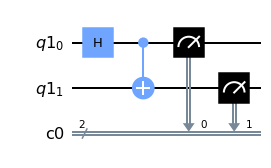

In [10]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
qc.h(0)
qc.cx(0,1)
qc.measure(qr,cr)
qc.draw(output='mpl')

### Agora vamos rodar no simulador este circuito

In [11]:
simulator = Aer.get_backend('qasm_simulator')
nshots = 8192

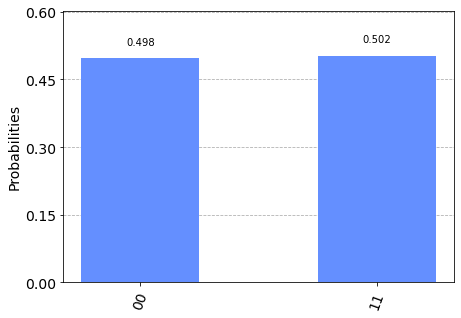

In [12]:
result = execute(qc,backend = simulator,shots = nshots).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(qc))

### Agora vamos rodar no chip da IBM

In [13]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#device.name()

In [14]:
job = execute(qc,backend=device,shots=nshots)

In [15]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


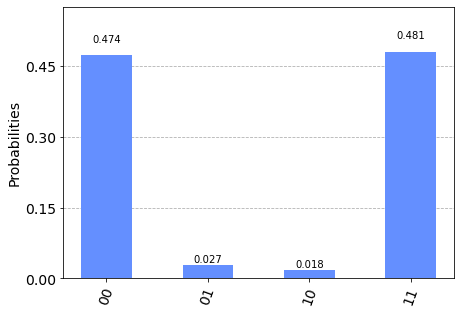

In [16]:
result=job.result()
plot_histogram(result.get_counts(qc))

### Tomografia de estados

In [17]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

In [ ]:
qr=QuantumRegister(1);
qc= qiskit.QuantumCircuit(qr);
qc.h(0);
qc.draw(output='mpl')

In [ ]:
qstc = state_tomography_circuits(qc,qr[0])
job = qiskit.execute(qstc,Aer.get_backend('qasm_simulator'),shots=nshots)
qstf = StateTomographyFitter(job.result(),qstc)

In [ ]:
rho = qstf.fit(method='lstsq')
rho

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_rho1qb(rho):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    result = [rho[0,0], rho[0,1], rho[1,0], rho[1,1]]
    result = np.array(result, dtype=float)
    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax1 = fig.add_subplot(111, projection='3d')
    xlabels = np.array([r'$|0\rangle$', r'$|1\rangle$']); xpos = np.arange(xlabels.shape[0])
    ylabels = np.array([r'$|1\rangle$', r'$|0\rangle$']); ypos = np.arange(ylabels.shape[0])
    xposM, yposM = np.meshgrid(xpos, ypos, copy=False); zpos = result
    dx = 0.5; dy = 0.5; dz = zpos
    ax1.set_xlim(0, 1.5); ax1.set_ylim(0, 1.5); ax1.set_zlim(-1, 1)
    ax1.w_xaxis.set_ticks(xpos + dx/2.0); ax1.w_xaxis.set_ticklabels(xlabels)
    ax1.w_yaxis.set_ticks(ypos + dy/2.0); ax1.w_yaxis.set_ticklabels(ylabels)
    values = np.linspace(0.2, 1.0, xposM.ravel().shape[0]); colors = cm.rainbow(values)
    ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
    plt.show()

In [ ]:
plot_rho1qb(rho.real)

In [ ]:
job = qiskit.execute(qstc,backend=device,shots=nshots)

In [ ]:
print(job.job_id()); job_monitor(job)


In [ ]:
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq')
plot_rho1qb(rho.real)

In [ ]:
plot_rho1qb(rho.imag)

In [ ]:
rho

## Aula 5

In [1]:
from qiskit import *

def ptraceA(da, db, rho):
    rhoB = zeros(db,db)
    for j in range(0, db):
        for k in range(0, db):
            for l in range(0, da):
                rhoB[j,k] += rho[l*db+j,l*db+k]
    return rhoB
def ptraceB(da, db, rho):
    rhoA = zeros(da,da)
    for j in range(0, da):
        for k in range(0, da):
            for l in range(0, db):
                rhoA[j,k] += rho[j*db+l,k*db+l]
    return rhoA
def pTraceL_num(dl, dr, rhoLR):
    # Returns the left partial trace over the 'left' subsystem of rhoLR
    rhoR = np.zeros((dr, dr), dtype=complex)
    for j in range(0, dr):
        for k in range(j, dr):
            for l in range(0, dl):
                rhoR[j,k] += rhoLR[l*dr+j,l*dr+k]
            if j != k:
                rhoR[k,j] = np.conj(rhoR[j,k])
    return rhoR


def pTraceR_num(dl, dr, rhoLR):
    # Returns the right partial trace over the 'right' subsystem of rhoLR
    rhoL = np.zeros((dl, dl), dtype=complex)
    for j in range(0, dl):
        for k in range(j, dl):
            for l in range(0, dr):
                rhoL[j,k] += rhoLR[j*dr+l,k*dr+l]
        if j != k:
            rhoL[k,j] = np.conj(rhoL[j,k])
    return rhoL

/home/v/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.tools.monitor import job_monitor
import math
from qiskit.quantum_info import Statevector

In [3]:
qc = QuantumCircuit(2)
qr = QuantumRegister(2)
theta=math.pi/3
phi=math.pi/4
qc.u(theta,0,0,0)
qc.u(phi,0,0,1)
qc.cx(0,1)
qc.barrier()
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.draw()

┌────────────┐      ░      ┌───┐     
q_0: ┤ U(π/3,0,0) ├──■───░───■──┤ X ├──■──
     ├────────────┤┌─┴─┐ ░ ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ U(π/4,0,0) ├┤ X ├─░─┤ X ├──■──┤ X ├
     └────────────┘└───┘ ░ └───┘     └───┘

In [4]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
simulator = provider.get_backend('ibmq_qasm_simulator')
device = provider.get_backend('ibmq_lima')#ibmq_belem')

IBMQProviderError: 'No provider matches the specified criteria: hub = ibm-q, group = open, project = main'

In [ ]:
nshots = 8192
qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
job = qiskit.execute(qstc, backend = device, shots = nshots)
print(job.job_id()); job_monitor(job)

In [ ]:
import numpy as np
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoBA = qstf.fit(method='lstsq'); # extrai o operador densidade
rhoA = pTraceL_num(2, 2, rhoBA); rhoA

In [ ]:
rhoB = pTraceR_num(2, 2, rhoBA); rhoB

In [ ]:
qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoBA = qstf.fit(method='lstsq'); # extrai o operador densidade

In [ ]:
import numpy as np
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoBA = qstf.fit(method='lstsq'); # extrai o operador densidade
rhoA = pTraceL_num(2, 2, rhoBA); rhoA

In [ ]:
rhoB = pTraceR_num(2, 2, rhoBA); rhoB